Linear SVM Accuracy: 0.9736842105263158
RBF SVM Accuracy: 0.9824561403508771
Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}

Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



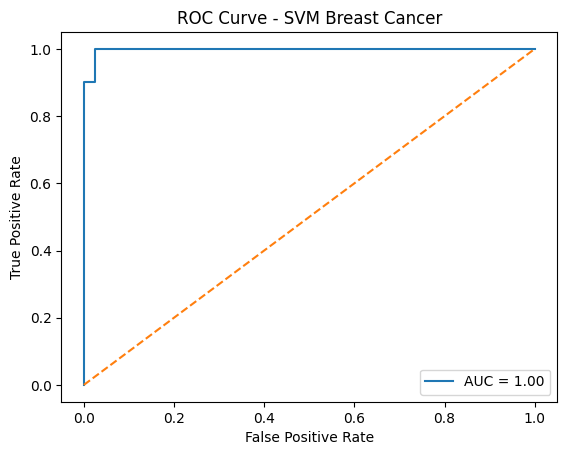

AUC Score: 0.9976851851851851
Model saved successfully.


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

linear_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", probability=True, random_state=42))
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear SVM Accuracy:",
      accuracy_score(y_test, y_pred_linear))

rbf_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)

print("RBF SVM Accuracy:",
      accuracy_score(y_test, y_pred_rbf))

param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__gamma": [0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    rbf_model,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Breast Cancer")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)


joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved successfully.")
